In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [28]:
stream_views_df = pd.read_csv("data/content_views_raw.csv", header=0)
stream_views_df.head()

,USERID,CARDID,CARDTITLE,STREAMID,STREAMNAME,TIMESTAMP,MODULEID,MODULENAME
0,1007,2798,QUICK TEST - WHAT IS IN MY ENGINE OIL?,561,What is engine oil made of?,31-05-2017 01:14,430,2. WHAT IS ENGINE OIL MADE OF?
1,1007,2798,QUICK TEST - WHAT IS IN MY ENGINE OIL?,561,What is engine oil made of?,31-05-2017 01:14,430,2. WHAT IS ENGINE OIL MADE OF?
2,1007,2798,QUICK TEST - WHAT IS IN MY ENGINE OIL?,561,What is engine oil made of?,31-05-2017 01:14,430,2. WHAT IS ENGINE OIL MADE OF?
3,1007,2808,ENGINE OIL ADDITIVES,561,What is engine oil made of?,31-05-2017 01:15,430,2. WHAT IS ENGINE OIL MADE OF?
4,1007,2808,ENGINE OIL ADDITIVES,561,What is engine oil made of?,31-05-2017 01:15,430,2. WHAT IS ENGINE OIL MADE OF?


In [29]:
stream_views_df = stream_views_df.drop(["CARDTITLE", "STREAMNAME", "MODULENAME", "MODULEID"], axis=1)
stream_views_df.head()

,USERID,CARDID,STREAMID,TIMESTAMP
0,1007,2798,561,31-05-2017 01:14
1,1007,2798,561,31-05-2017 01:14
2,1007,2798,561,31-05-2017 01:14
3,1007,2808,561,31-05-2017 01:15
4,1007,2808,561,31-05-2017 01:15


In [30]:
stream_views_df["date"] = stream_views_df["TIMESTAMP"].apply(lambda x: x.split(" ")[0].strip())
stream_views_df["time"] = stream_views_df["TIMESTAMP"].apply(lambda x: x.split(" ")[1].strip())
stream_views_df = stream_views_df.drop("TIMESTAMP", axis=1)
stream_views_df.head()

,USERID,CARDID,STREAMID,date,time
0,1007,2798,561,31-05-2017,01:14
1,1007,2798,561,31-05-2017,01:14
2,1007,2798,561,31-05-2017,01:14
3,1007,2808,561,31-05-2017,01:15
4,1007,2808,561,31-05-2017,01:15


In [31]:
def concat_time(time_str):
    return int(time_str[:2]) * 100 + int(time_str[3:5])

stream_views_df["time_concatenated"] = stream_views_df["time"].apply(concat_time)

In [32]:
stream_views_df.head()

,USERID,CARDID,STREAMID,date,time,time_concatenated
0,1007,2798,561,31-05-2017,01:14,114
1,1007,2798,561,31-05-2017,01:14,114
2,1007,2798,561,31-05-2017,01:14,114
3,1007,2808,561,31-05-2017,01:15,115
4,1007,2808,561,31-05-2017,01:15,115


In [33]:
def label_time(x):
    if x < 800 or x >= 2000:
        return "OWH"
    elif x >= 800 and x < 1200:
        return "Morning"
    elif x >= 1200 and x < 1600:
        return "Afternoon"
    elif x >= 1600 and x < 2000:
        return "Evening"
    
stream_views_df["time_labeled"] = stream_views_df["time_concatenated"].apply(label_time)  
stream_views_df.head()

,USERID,CARDID,STREAMID,date,time,time_concatenated,time_labeled
0,1007,2798,561,31-05-2017,01:14,114,OWH
1,1007,2798,561,31-05-2017,01:14,114,OWH
2,1007,2798,561,31-05-2017,01:14,114,OWH
3,1007,2808,561,31-05-2017,01:15,115,OWH
4,1007,2808,561,31-05-2017,01:15,115,OWH


G:\anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


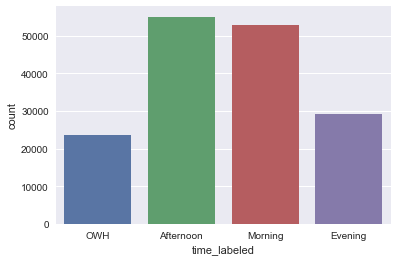

In [34]:
import seaborn as sns
sns.set(style="darkgrid")
ax = sns.countplot(x="time_labeled", data=stream_views_df)

In [35]:
import datetime

def convert_to_date_of_week(x):
    d = datetime.datetime.strptime(x, "%d-%m-%Y").date()
    days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Weekend", "Weekend"]
    return days_of_week[d.weekday()]

stream_views_df["day_of_week"] = stream_views_df["date"].apply(convert_to_date_of_week)  
stream_views_df.head()

,USERID,CARDID,STREAMID,date,time,time_concatenated,time_labeled,day_of_week
0,1007,2798,561,31-05-2017,01:14,114,OWH,Wednesday
1,1007,2798,561,31-05-2017,01:14,114,OWH,Wednesday
2,1007,2798,561,31-05-2017,01:14,114,OWH,Wednesday
3,1007,2808,561,31-05-2017,01:15,115,OWH,Wednesday
4,1007,2808,561,31-05-2017,01:15,115,OWH,Wednesday


G:\anaconda\lib\site-packages\seaborn\categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


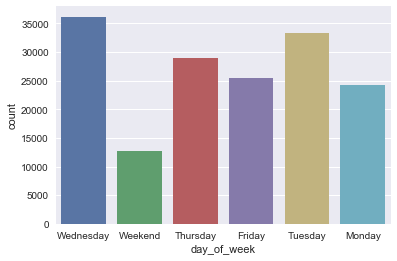

In [36]:
sns.set(style="darkgrid")
ax = sns.countplot(x="day_of_week", data=stream_views_df)

## Num employees watching the streams

In [37]:
stream_views_df["USERID"].nunique()

219

## Unique streams present

In [38]:
stream_views_df["STREAMID"].nunique()

153

## Combine the stream views for a user and stream

In [39]:
stream_views_df.head()

,USERID,CARDID,STREAMID,date,time,time_concatenated,time_labeled,day_of_week
0,1007,2798,561,31-05-2017,01:14,114,OWH,Wednesday
1,1007,2798,561,31-05-2017,01:14,114,OWH,Wednesday
2,1007,2798,561,31-05-2017,01:14,114,OWH,Wednesday
3,1007,2808,561,31-05-2017,01:15,115,OWH,Wednesday
4,1007,2808,561,31-05-2017,01:15,115,OWH,Wednesday


In [40]:
stream_views_grouped_time_df = stream_views_df.groupby(["USERID", "STREAMID"])["time_concatenated"].mean().reset_index()
stream_views_grouped_time_df.head()

,USERID,STREAMID,time_concatenated
0,245,163,1414.703596
1,245,167,1633.251938
2,245,171,1419.065041
3,245,172,1486.048193
4,245,173,1482.485030


In [41]:
stream_views_grouped_size_df = stream_views_df.groupby(["USERID", "STREAMID"]).size().reset_index()
stream_views_grouped_size_df.head()

,USERID,STREAMID,0
0,245,163,1029
1,245,167,258
2,245,171,123
3,245,172,83
4,245,173,167


In [42]:
from scipy import stats
stream_views_grouped_day_df = stream_views_df.groupby(["USERID", "STREAMID"])["day_of_week"].agg(lambda x: stats.mode(x)[0][0]).reset_index()
stream_views_grouped_day_df.head()

G:\anaconda\lib\site-packages\scipy\stats\stats.py:253: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


,USERID,STREAMID,day_of_week
0,245,163,Wednesday
1,245,167,Thursday
2,245,171,Wednesday
3,245,172,Wednesday
4,245,173,Monday


In [43]:
stream_views_grouped_df = stream_views_grouped_time_df.merge(stream_views_grouped_size_df, on = ["USERID", "STREAMID"])
stream_views_grouped_df.head()

,USERID,STREAMID,time_concatenated,0
0,245,163,1414.703596,1029
1,245,167,1633.251938,258
2,245,171,1419.065041,123
3,245,172,1486.048193,83
4,245,173,1482.485030,167


In [44]:
stream_views_grouped_df = stream_views_grouped_df.merge(stream_views_grouped_day_df, on = ["USERID", "STREAMID"])
stream_views_grouped_df.head()

,USERID,STREAMID,time_concatenated,0,day_of_week
0,245,163,1414.703596,1029,Wednesday
1,245,167,1633.251938,258,Thursday
2,245,171,1419.065041,123,Wednesday
3,245,172,1486.048193,83,Wednesday
4,245,173,1482.485030,167,Monday


In [45]:
stream_views_grouped_df["time_labeled"] = stream_views_grouped_df["time_concatenated"].apply(label_time)  
stream_views_grouped_df.head()

,USERID,STREAMID,time_concatenated,0,day_of_week,time_labeled
0,245,163,1414.703596,1029,Wednesday,Afternoon
1,245,167,1633.251938,258,Thursday,Evening
2,245,171,1419.065041,123,Wednesday,Afternoon
3,245,172,1486.048193,83,Wednesday,Afternoon
4,245,173,1482.485030,167,Monday,Afternoon


In [46]:
stream_views_grouped_df.columns = ['USERID', 'STREAMID', 'time_concatenated', 'total_num_views', 'day_of_week', 'time_labeled']

In [47]:
stream_views_grouped_df.head()

,USERID,STREAMID,time_concatenated,total_num_views,day_of_week,time_labeled
0,245,163,1414.703596,1029,Wednesday,Afternoon
1,245,167,1633.251938,258,Thursday,Evening
2,245,171,1419.065041,123,Wednesday,Afternoon
3,245,172,1486.048193,83,Wednesday,Afternoon
4,245,173,1482.485030,167,Monday,Afternoon


In [48]:
stream_views_grouped_df.to_csv("generated/stream_views_grouped_by_userid_streamid.csv", index=False)

## Get the number of cards per stream from the stream cards mapping file

In [ ]:
stream_cards_df = pd.read_csv("../data/stream_cards.csv", header=0, encoding="ISO-8859-1")
stream_cards_df.head()

In [ ]:
stream_cards_grouped_df = stream_cards_df.groupby(["STREAMID"]).size().reset_index()
stream_cards_grouped_df.head()

In [ ]:
stream_cards_values = stream_cards_grouped_df.values
stream_cards_values.shape

In [ ]:
stream_cards_grouped_df.columns = ["STREAMID", "num_cards"]

## Add code to get the number of cards for each stream

In [ ]:
def get_num_cards_for_stream(stream_id):
    stream_df = stream_cards_grouped_df[stream_cards_grouped_df["STREAMID"] == stream_id]
    if stream_df.empty:
        return 1
    else:
        return stream_cards_grouped_df[stream_cards_grouped_df["STREAMID"] == stream_id]["num_cards"].values[0]

In [ ]:
get_num_cards_for_stream(163)

In [ ]:
stream_views_grouped_df["num_cards"] = stream_views_grouped_df["STREAMID"].apply(get_num_cards_for_stream)
stream_views_grouped_df.head()

In [ ]:
stream_views_grouped_df.columns.values

In [ ]:
stream_views_grouped_df.columns = ['USERID', 'STREAMID', 'time_concatenated', 'num_views', 'day_of_week', 'time_labeled', 'num_cards']

In [ ]:
stream_views_grouped_df = stream_views_grouped_df.drop(["time_concatenated"], axis=1)

In [ ]:
stream_views_grouped_df["views_per_card"] = stream_views_grouped_df["num_views"]/stream_views_grouped_df["num_cards"]

In [ ]:
stream_views_grouped_df = stream_views_grouped_df.to_csv("generated/user_views_per_stream.csv", index=False)